In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv("Datasets/survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
df['GENDER'].value_counts()

GENDER
M    162
F    147
Name: count, dtype: int64

In [5]:
group=df[['GENDER','LUNG_CANCER']]
grouped=group.groupby('GENDER')[['LUNG_CANCER']].count()
grouped

,LUNG_CANCER
GENDER,
F,147
M,162


<Axes: xlabel='GENDER', ylabel='LUNG_CANCER'>

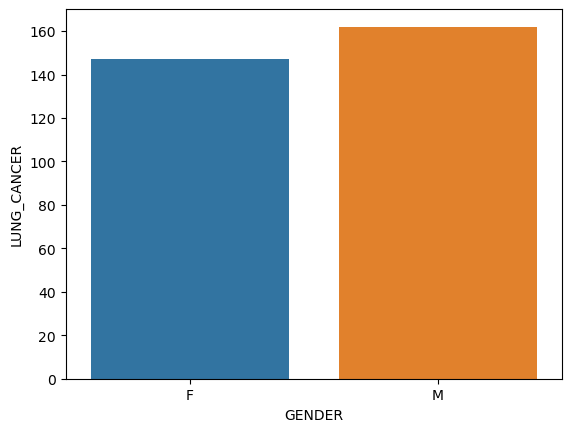

In [6]:
sns.barplot(data=grouped,x=grouped.index,y='LUNG_CANCER')

In [7]:
le = LabelEncoder()
# label_encoder = preprocessing.LabelEncoder() 
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
# df[['LUNG_CANCER','GENDER']]=label_encoder.fit_transform(df[['LUNG_CANCER','GENDER']])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [8]:
df['GENDER']=le.fit_transform(df['GENDER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int32
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [10]:
# X=df[['GENDER','AGE','SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC_DISEASE','']]
features=df.drop(['LUNG_CANCER'],axis=1)
features.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [11]:
X=np.asarray(features)
X

array([[ 1, 69,  1, ...,  2,  2,  2],
       [ 1, 74,  2, ...,  2,  2,  2],
       [ 0, 59,  1, ...,  2,  1,  2],
       ...,
       [ 1, 58,  2, ...,  1,  1,  2],
       [ 1, 67,  2, ...,  2,  1,  2],
       [ 1, 62,  1, ...,  1,  2,  1]], dtype=int64)

In [12]:
y=np.asarray(df['LUNG_CANCER'])
y

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.95257934,  0.77185028, -1.13529242,  0.86929961,  1.0032415 ,
        -1.0032415 , -1.00975633,  0.6968335 , -1.12047956,  0.892475  ,
         0.892475  ,  0.85220712,  0.74873631,  1.06350105,  0.892475  ],
       [ 0.95257934,  1.38182914,  0.88083033, -1.15035137, -0.99676897,
        -1.0032415 ,  0.99033794,  0.6968335 ,  0.892475  , -1.12047956,
        -1.12047956, -1.17342366,  0.74873631,  1.06350105,  0.892475  ],
       [-1.04978132, -0.44810745, -1.13529242, -1.15035137, -0.99676897,
         0.99676897, -1.00975633,  0.6968335 , -1.12047956,  0.892475  ,
        -1.12047956,  0.85220712,  0.74873631, -0.94029056,  0.892475  ],
       [ 0.95257934,  0.03987564,  0.88083033,  0.86929961,  1.0032415 ,
        -1.0032415 , -1.00975633, -1.43506304, -1.12047956, -1.12047956,
         0.892475  , -1.17342366, -1.33558369,  1.06350105,  0.892475  ],
       [-1.04978132,  0.03987564, -1.13529242,  0.86929961, -0.99676897,
        -1.0032415 , -1.00975633, -1.43506304, 

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (247, 15) (247,)
Test set: (62, 15) (62,)


In [15]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [16]:
lr=LogisticRegression()
logreg_cv=GridSearchCV(lr,parameters,cv=10)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [17]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.931


In [18]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['no', 'yes']); ax.yaxis.set_ticklabels(['no', 'yes']) 
    plt.show()

0.9516129032258065


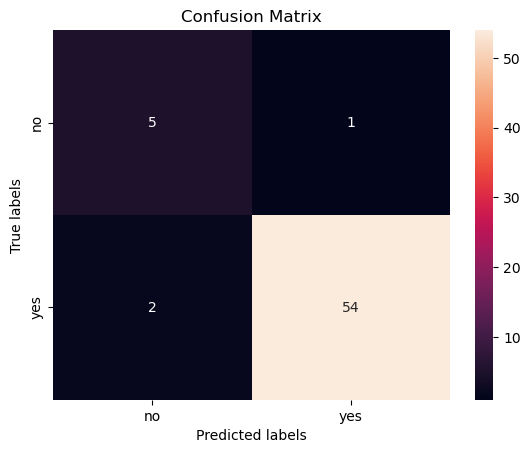

None


In [20]:
logistic=logreg_cv.predict(X_test)
print(metrics.accuracy_score(y_test,logistic))
print(plot_confusion_matrix(y_test,logistic))

In [22]:
print(metrics.mean_squared_error(y_test,logistic))

0.04838709677419355


In [23]:
jaccard_score(y_test, logistic,pos_label=0)

0.625

**knn**

In [24]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv=GridSearchCV(KNN,parameters,cv=10)

In [25]:
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [26]:
print(knn_cv.best_params_)

{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}


In [27]:
print(knn_cv.best_score_)

0.9268333333333333


accuracy : 0.9193548387096774


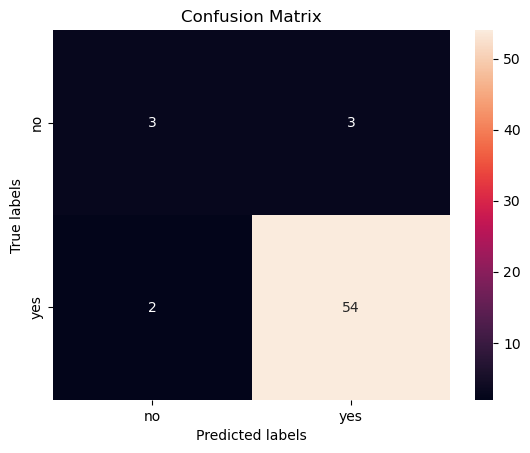

None


In [28]:
KNN=knn_cv.score(X_test,y_test)
print("accuracy :", KNN)
yhat=knn_cv.predict(X_test)
print(plot_confusion_matrix(y_test,yhat))

In [29]:
print(metrics.mean_squared_error(y_test,yhat))

0.08064516129032258


decision tree

In [44]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
tree=DecisionTreeClassifier()

In [45]:
DT=GridSearchCV(tree,parameters,cv=10)
DT.fit(X_train,y_train)
print(DT.best_params_)
print(DT.best_score_)

{'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.9110000000000001


C:\Users\SB INFO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SB INFO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SB INFO\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\SB INFO\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\SB INFO\anaconda3\Li

In [46]:
decision_tree=DT.predict(X_test)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, decision_tree))

Test set Accuracy:  0.9032258064516129


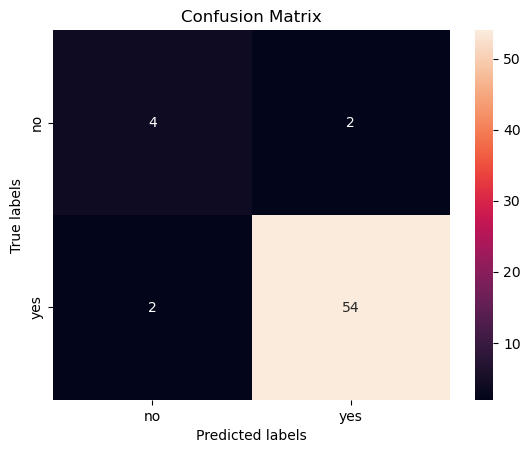

None


In [47]:
print(plot_confusion_matrix(y_test,yhat))

In [48]:
print(metrics.mean_squared_error(y_test,yhat))

0.06451612903225806


In [35]:
from sklearn.svm import SVC

In [36]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [37]:
svm_cv = GridSearchCV(estimator=svm, cv=10, param_grid=parameters)
svm_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [38]:
print(svm_cv.best_params_)
print(svm_cv.best_score_)

{'C': 1000.0, 'gamma': 0.001, 'kernel': 'rbf'}
0.9391666666666667


accuracy : 0.9193548387096774


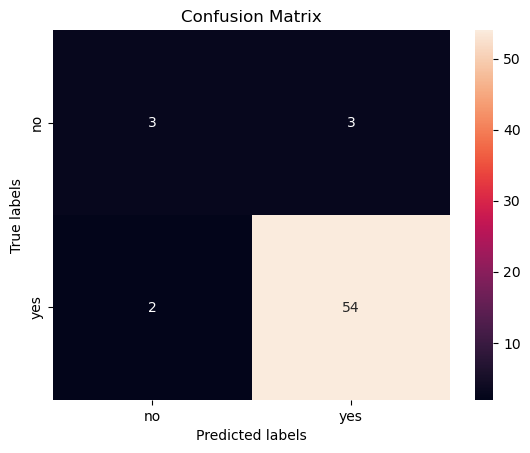

None


In [41]:
KVC=knn_cv.predict(X_test)
print("accuracy :",metrics.accuracy_score(y_test,KVC))
print(plot_confusion_matrix(y_test,KVC))

In [42]:
print(metrics.mean_squared_error(y_test,KVC))

0.08064516129032258


In [ ]:
ebst estimator


In [49]:
predictions=pd.DataFrame({'LOGISTIC':logistic,'decision_tree':decision_tree,'KNN':KNN},index=[1])
predictions
# sns.barplot(prediction)
# plt.xlabel("Models")
# plt.ylabel("Accuracy")

ValueError: Length of values (62) does not match length of index (1)

for practice of sql

In [3]:
%load_ext sql

In [4]:
import csv, sqlite3

In [5]:
con=sqlite3.connect("my_data_2.db")
cur=con.cursor()

In [6]:
cur

In [9]:
%sql sqlite:///my_data_2.db

In [13]:
df=pd.read_csv("Datasets/survey lung cancer.csv")
df.to_sql("cancer",con,if_exists="replace",index=False,method="multi")

309

In [14]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
